In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from algorithms.basic_gd import gd

In [8]:
sns.set_style("whitegrid")

In [2]:
# Data Generating Model
def data_generating_model(n, w):
    np.random.seed(42)
    z = np.empty((n, 2))
    z[:, 0] = np.random.uniform(-10, 10, size=n)
    p = w[0] + w[1] * z[:, 0]
    p = np.exp(p) / (1 + np.exp(p))
    z[:, 1] = np.random.binomial(1, p, size=n)
    return z

n_obs = 500
w_true = np.array([0, 1])
z_obs = data_generating_model(n_obs, w_true)

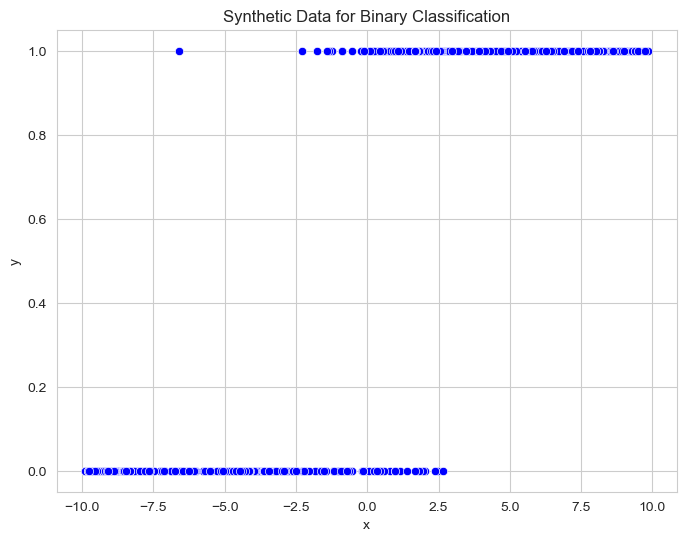

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=z_obs[:, 0], y=z_obs[:, 1], color='blue', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Data for Binary Classification')
plt.show()

In [4]:
# Prediction Rule
def prediction_rule(x, w):
    h = w[0] + w[1] * x
    h = np.exp(h) / (1.0 + np.exp(h))
    return h

# Loss Function
def loss_fun(w, z):
    x, y = z
    h = prediction_rule(x, w)
    ell = -y * np.log(h) - (1 - y) * np.log(1 - h)
    return ell

# Gradient of Loss Function
def grad_loss_fun(w, z):
    x, y = z
    h = prediction_rule(x, w)
    grd = np.array([h - y, (h - y) * x])
    return grd

# Gradient of Risk Function
def grad_risk_fun(w, z, n):
    grd = np.zeros_like(w)
    for i in range(n):
        grd += grad_loss_fun(w, z[i, :])
    grd /= n
    return grd

In [5]:
def grad_fun(w):
    return grad_risk_fun(w, z_obs, n_obs)
    
optimal_w, w_trace = gd(grad_fun, (-1, 1.5), return_trace=True)

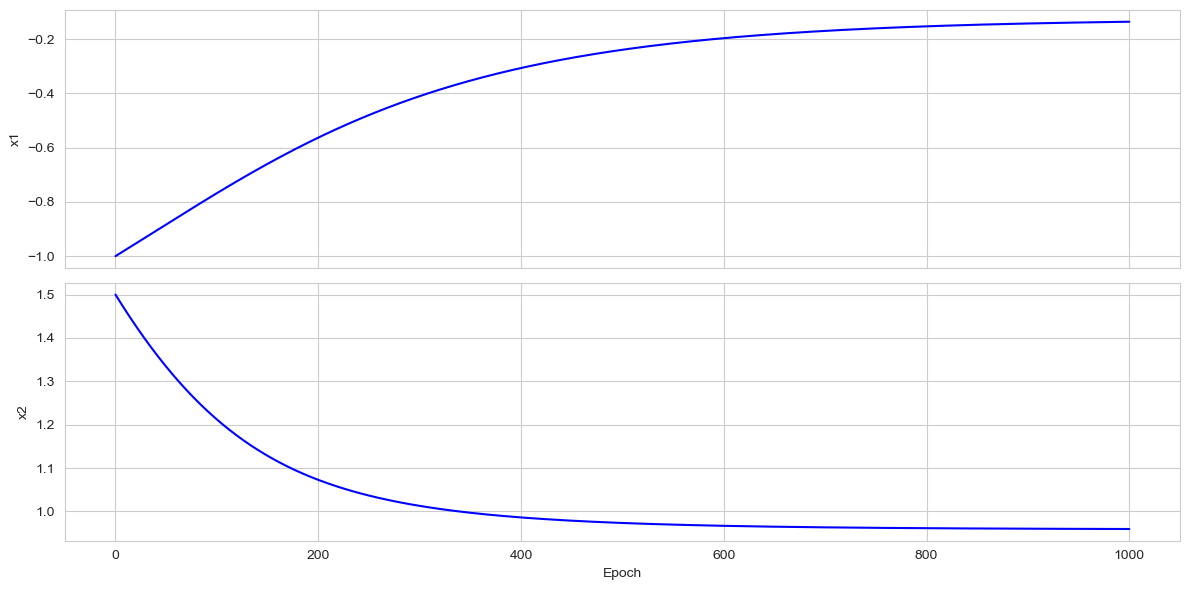

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

sns.lineplot(x=range(len(w_trace)), y=w_trace[:, 0], ax=ax1, color='blue')
ax1.set_ylabel('x1')

sns.lineplot(x=range(len(w_trace)), y=w_trace[:, 1], ax=ax2, color='blue')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('x2')

plt.tight_layout()
plt.show()